# III. Creating and Training a model

In this part, we shall create a model and test different algoirthms.

1. Import data
2. Create the model
3. Test different algorithms and evaluate performance
4. Compare algorithm performance and chose best algorithm
5. Further evidence to convince us that the chosen model performs well
5. Save best performing algorithm based on F1


In [1]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

### 1. Import and merge datasets

In [2]:
#import first data set (CPtrain values)
train=pd.read_csv('train_modif2.csv',sep=',')
train.shape

(18830, 2)

In [3]:
train.head()

,row_id,doc_text
0,0,information visit httpwwwworldbankorgprospects...
1,1,wwwifcorgthoughtleadership note 28 january 201...
2,2,wps4830 p olicy r esearch w orking p aper 4830...
3,3,71399 procurement monitoring social accountabi...
4,4,90189 executive board meeting minutes meeting ...


In [4]:
#import second data set (CPtrain label)
labels=pd.read_csv('train_labels.csv', sep=',')
labels.shape


(18830, 30)

In [5]:
labels.columns

Index(['row_id', 'information_and_communication_technologies', 'governance',
       'urban_development', 'law_and_development', 'public_sector_development',
       'agriculture', 'communities_and_human_settlements',
       'health_and_nutrition_and_population', 'culture_and_development',
       'environment', 'social_protections_and_labor', 'industry',
       'macroeconomics_and_economic_growth',
       'international_economics_and_trade', 'conflict_and_development',
       'finance_and_financial_sector_development',
       'science_and_technology_development', 'rural_development',
       'poverty_reduction', 'private_sector_development', 'informatics',
       'energy', 'social_development', 'water_resources', 'education',
       'transport', 'water_supply_and_sanitation', 'gender',
       'infrastructure_economics_and_finance'],
      dtype='object')

In [6]:
# See how many duplicates per rowid I hvae on Labels training data (I have 0 duplicates)
print(labels.shape)
print (labels.row_id.unique().shape)

(18830, 30)
(18830,)


In [7]:
#Merge the 2 tables
df= pd.concat([train,labels],axis=1)
df.shape

(18830, 32)

In [8]:
df.columns

Index(['row_id', 'doc_text', 'row_id',
       'information_and_communication_technologies', 'governance',
       'urban_development', 'law_and_development', 'public_sector_development',
       'agriculture', 'communities_and_human_settlements',
       'health_and_nutrition_and_population', 'culture_and_development',
       'environment', 'social_protections_and_labor', 'industry',
       'macroeconomics_and_economic_growth',
       'international_economics_and_trade', 'conflict_and_development',
       'finance_and_financial_sector_development',
       'science_and_technology_development', 'rural_development',
       'poverty_reduction', 'private_sector_development', 'informatics',
       'energy', 'social_development', 'water_resources', 'education',
       'transport', 'water_supply_and_sanitation', 'gender',
       'infrastructure_economics_and_finance'],
      dtype='object')

In [9]:
df.drop(['row_id'], axis = 1, inplace = True)
df

,doc_text,information_and_communication_technologies,governance,urban_development,law_and_development,public_sector_development,agriculture,communities_and_human_settlements,health_and_nutrition_and_population,culture_and_development,...,private_sector_development,informatics,energy,social_development,water_resources,education,transport,water_supply_and_sanitation,gender,infrastructure_economics_and_finance
0,information visit httpwwwworldbankorgprospects...,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,wwwifcorgthoughtleadership note 28 january 201...,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,wps4830 p olicy r esearch w orking p aper 4830...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,71399 procurement monitoring social accountabi...,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,90189 executive board meeting minutes meeting ...,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,90966 international comparison program icp rev...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,central asia earthquake risk reduction forum f...,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,46966 samuel clark blair palmer indonesian soc...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,53062 ppi update note 26 november 2009 private...,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,63696 creating opportunities women ifc women p...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
#place doc_text at the begining
cols = ['doc_text']+[col for col in df if col != 'doc_text']
df = df[cols]
df.head()

,doc_text,information_and_communication_technologies,governance,urban_development,law_and_development,public_sector_development,agriculture,communities_and_human_settlements,health_and_nutrition_and_population,culture_and_development,...,private_sector_development,informatics,energy,social_development,water_resources,education,transport,water_supply_and_sanitation,gender,infrastructure_economics_and_finance
0,information visit httpwwwworldbankorgprospects...,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,wwwifcorgthoughtleadership note 28 january 201...,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,wps4830 p olicy r esearch w orking p aper 4830...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,71399 procurement monitoring social accountabi...,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,90189 executive board meeting minutes meeting ...,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print('Number of missing docs in doc_text:')
df['doc_text'].isnull().sum()

Number of missing docs in doc_text:


1

In [12]:
# Will drop all rows that have any missing values.
df.dropna(inplace=True)
# Check for missing values
missing_values_check = df.isnull().sum()
print(missing_values_check)

doc_text                                      0
information_and_communication_technologies    0
governance                                    0
urban_development                             0
law_and_development                           0
public_sector_development                     0
agriculture                                   0
communities_and_human_settlements             0
health_and_nutrition_and_population           0
culture_and_development                       0
environment                                   0
social_protections_and_labor                  0
industry                                      0
macroeconomics_and_economic_growth            0
international_economics_and_trade             0
conflict_and_development                      0
finance_and_financial_sector_development      0
science_and_technology_development            0
rural_development                             0
poverty_reduction                             0
private_sector_development              

In [13]:
categories = list(df.columns.values)
categories = categories[2:]
print(categories)

['governance', 'urban_development', 'law_and_development', 'public_sector_development', 'agriculture', 'communities_and_human_settlements', 'health_and_nutrition_and_population', 'culture_and_development', 'environment', 'social_protections_and_labor', 'industry', 'macroeconomics_and_economic_growth', 'international_economics_and_trade', 'conflict_and_development', 'finance_and_financial_sector_development', 'science_and_technology_development', 'rural_development', 'poverty_reduction', 'private_sector_development', 'informatics', 'energy', 'social_development', 'water_resources', 'education', 'transport', 'water_supply_and_sanitation', 'gender', 'infrastructure_economics_and_finance']


In [14]:
df = df
df = df.loc[np.random.choice(df.index, size=18000)]
df.shape

(18000, 30)

### 2. Create the model

Split data (train/test) 

In [15]:
# Split data
categories = categories
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)

X_train = train.doc_text
X_test = test.doc_text
Y_train = train.drop(labels = ['doc_text'], axis=1)
Y_test = test.drop(labels = ['doc_text'], axis=1)
print(X_train.shape)
print(X_test.shape)



(12060,)
(5940,)


### 3. Algorithm training and evaluation of performance

**Algorithm 1: Naive Bayes**

In [16]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
for category in categories:
    print('... Processing {}'.format(category),' : done')
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, Y_train)
    # compute the testing accuracy
    predictionNBt = NB_pipeline.predict(X_test)
    

... Processing governance  : done
... Processing urban_development  : done
... Processing law_and_development  : done
... Processing public_sector_development  : done
... Processing agriculture  : done
... Processing communities_and_human_settlements  : done
... Processing health_and_nutrition_and_population  : done
... Processing culture_and_development  : done
... Processing environment  : done
... Processing social_protections_and_labor  : done
... Processing industry  : done
... Processing macroeconomics_and_economic_growth  : done
... Processing international_economics_and_trade  : done
... Processing conflict_and_development  : done
... Processing finance_and_financial_sector_development  : done
... Processing science_and_technology_development  : done
... Processing rural_development  : done
... Processing poverty_reduction  : done
... Processing private_sector_development  : done
... Processing informatics  : done
... Processing energy  : done
... Processing social_development 

In [17]:
from sklearn.metrics import f1_score
print(f1_score(Y_test,predictionNBt, average='weighted'))
print(f1_score(Y_test,predictionNBt, average='macro'))


0.15872821042338725
0.059266979585215256


In [18]:
print(predictionNBt)
print(predictionNBt.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(5940, 29)


**Algorithm 2: Linear SVC**

In [19]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category),' : done')
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, Y_train)
    # compute the testing accuracy
    predictionSVCt = SVC_pipeline.predict(X_test)


... Processing governance  : done
... Processing urban_development  : done
... Processing law_and_development  : done
... Processing public_sector_development  : done
... Processing agriculture  : done
... Processing communities_and_human_settlements  : done
... Processing health_and_nutrition_and_population  : done
... Processing culture_and_development  : done
... Processing environment  : done
... Processing social_protections_and_labor  : done
... Processing industry  : done
... Processing macroeconomics_and_economic_growth  : done
... Processing international_economics_and_trade  : done
... Processing conflict_and_development  : done
... Processing finance_and_financial_sector_development  : done
... Processing science_and_technology_development  : done
... Processing rural_development  : done
... Processing poverty_reduction  : done
... Processing private_sector_development  : done
... Processing informatics  : done
... Processing energy  : done
... Processing social_development 

In [20]:
from sklearn.metrics import f1_score
print(f1_score(Y_test,predictionSVCt, average='weighted'))
print(f1_score(Y_test,predictionSVCt, average='macro'))

0.7867311312928253
0.7603345032126654


**Algorithm 3: Logistic Regression**

In [21]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), 
                                            n_jobs=1)),
                            ])
for category in categories:
    print('... Processing {}'.format(category),' : done')
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, Y_train)
    # compute the testing accuracy
    predictionLogRegt = LogReg_pipeline.predict(X_test)


... Processing governance  : done
... Processing urban_development  : done
... Processing law_and_development  : done
... Processing public_sector_development  : done
... Processing agriculture  : done
... Processing communities_and_human_settlements  : done
... Processing health_and_nutrition_and_population  : done
... Processing culture_and_development  : done
... Processing environment  : done
... Processing social_protections_and_labor  : done
... Processing industry  : done
... Processing macroeconomics_and_economic_growth  : done
... Processing international_economics_and_trade  : done
... Processing conflict_and_development  : done
... Processing finance_and_financial_sector_development  : done
... Processing science_and_technology_development  : done
... Processing rural_development  : done
... Processing poverty_reduction  : done
... Processing private_sector_development  : done
... Processing informatics  : done
... Processing energy  : done
... Processing social_development 

In [22]:
from sklearn.metrics import f1_score
print(f1_score(Y_test,predictionLogRegt, average='weighted'))
print(f1_score(Y_test,predictionLogRegt, average='macro'))

0.5750305030852316
0.4753585442552808


C:\Users\Florence\Anaconda333\envs\textpro\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Florence\Anaconda333\envs\textpro\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 4. Compare and chose best model 

In [23]:
print('NB F1 score average weighted is', f1_score(Y_test,predictionNBt, average='weighted'))
print('SVC F1 score average weighted is', f1_score(Y_test,predictionSVCt, average='weighted'))
print('Logistic Regression F1 score average weighted is', f1_score(Y_test,predictionLogRegt, average='weighted'))


NB F1 score average weighted is 0.15872821042338725
SVC F1 score average weighted is 0.7867311312928253
Logistic Regression F1 score average weighted is 0.5750305030852316


C:\Users\Florence\Anaconda333\envs\textpro\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Consequently the best model is SVC

### 5. Furhter evidence that the model created is good.

F1 score is the correct way to assess multilabel classification.  The following code shows the accuracy of the prediction for each of the labels. 


In [24]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing governance
Test accuracy is 0.9567340067340068
... Processing urban_development
Test accuracy is 0.9693602693602693
... Processing law_and_development
Test accuracy is 0.9367003367003367
... Processing public_sector_development
Test accuracy is 0.92996632996633
... Processing agriculture
Test accuracy is 0.9673400673400674
... Processing communities_and_human_settlements
Test accuracy is 0.9686868686868687
... Processing health_and_nutrition_and_population
Test accuracy is 0.937037037037037
... Processing culture_and_development
Test accuracy is 0.9930976430976431
... Processing environment
Test accuracy is 0.9558922558922559
... Processing social_protections_and_labor
Test accuracy is 0.9488215488215488
... Processing industry
Test accuracy is 0.9188552188552188
... Processing macroeconomics_and_economic_growth
Test accuracy is 0.8893939393939394
... Processing international_economics_and_trade
Test accuracy is 0.9533670033670034
... Processing conflict_and_development


See how now, when visualizing most common words in the topic (label) Education, we can no longer see the word "Bank"

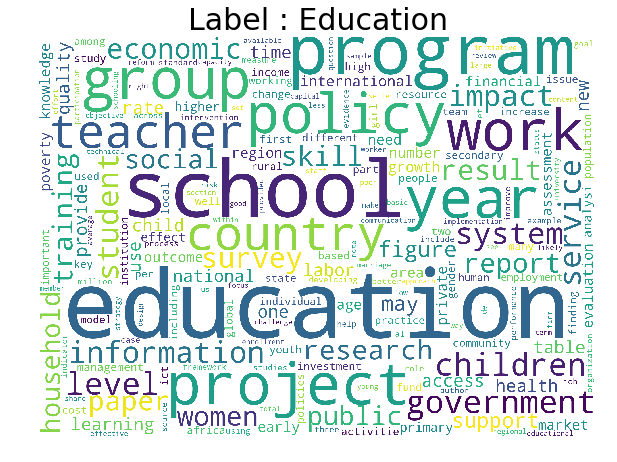

In [32]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(10,10))
# Education
subset = df[df.education==True]
text = subset.doc_text.values
cloud_education = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Label : Education",fontsize=30)
PlotA = plt.imshow(cloud_education)

### 5. Save the best model 

In [33]:
# Saving SVC model
from sklearn.externals import joblib
from joblib import dump, load
  

In [34]:
dump(SVC_pipeline,'SVC_pipeline.joblib')  

['SVC_pipeline.joblib']

In [35]:
## For testing the model with unlabeled docs(test), I should proceed as follows 
#clf = load('SVC_pipeline.joblib')
#clf.predict(test.doc_text)


In [36]:
#predictionSVC = clf.predict(test.doc_text)
#predictionSVC.shape

In [37]:
# Saving predictions
#import numpy as np
#import pandas as pd
#predictionSVC = pd.DataFrame(predictionSVC).to_csv('predictionSVC2.csv')